# Comparing Elasticity Changes due to model correction

The objective of this notebook is to compare the elasticiy estimation of a policy. A first baseline contains an error in the magnitude of the transit fare, which forces us to change the baseline, and any other policy run with this bug. However, we hypothesize that the estimation of the elasticity for policies not related to transit fare are not significantly affected, and therefore, there the conclusion based on the elasticities estimates with the bug are still the same. 

In [1]:
import pandas as pd 
import numpy as np
import os

import matplotlib.pyplot as plt

In [2]:
kpis = os.listdir("../kpis/summary/old_summary/")
old_dir = "../kpis/summary/old_summary"
new_dir = "../kpis/summary"

## Test 1 - Transit Frequency Policy test

In [3]:
r = []
for kpi in kpis:
    new_fpath = os.path.join(new_dir, kpi)
    new = pd.read_csv(new_fpath)
    new_clean = new[new.policy == 'transit_frequency'][['policy', 'category', 'mean_elasticity']]
    new_clean['policy'] = kpi[:-4]
    new_clean.rename(columns = {'mean_elasticity': 'new_elasticity'}, inplace = True)
    new_clean.set_index(['policy','category'], inplace = True)
    
    old_fpath = os.path.join(old_dir, kpi)
    old = pd.read_csv(old_fpath)
    old_clean = old[old.policy == 'transit_frequency'][['policy', 'category', 'mean_elasticity']]
    old_clean['policy'] = kpi[:-4]
    old_clean.rename(columns = {'mean_elasticity': 'old_elasticity'}, inplace = True)
    old_clean.set_index(['policy','category'], inplace = True)
    
    result = pd.concat([new_clean, old_clean], axis = 1)
    
    r.append(result)

In [12]:
diff = pd.concat(r, axis = 0)
diff['diff'] = diff['new_elasticity'] - diff['old_elasticity']
diff['pct'] = ((diff['new_elasticity'] - diff['old_elasticity'])/diff['new_elasticity']).apply(np.abs)

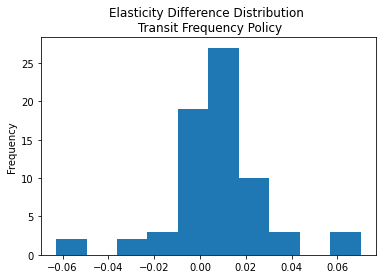

In [13]:
diff['diff'].plot.hist()
plt.title('Elasticity Difference Distribution \n Transit Frequency Policy');

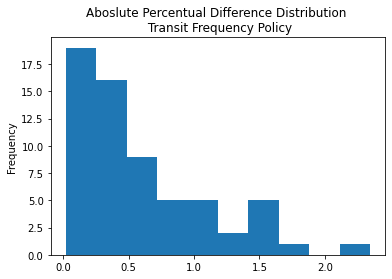

In [14]:
diff[diff['pct']<9]['pct'].plot.hist()
plt.title('Aboslute Percentual Difference Distribution \n Transit Frequency Policy');

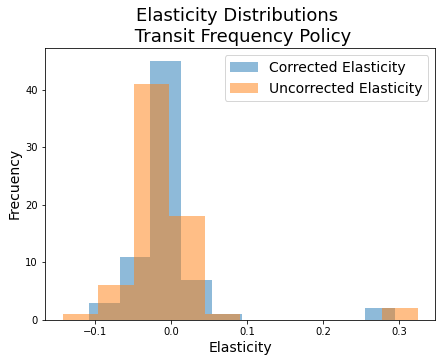

In [77]:
diff['new_elasticity'].plot.hist(alpha = 0.5, label = 'Corrected Elasticity', figsize=(7, 5))
diff['old_elasticity'].plot.hist(alpha = 0.5, label = 'Uncorrected Elasticity')
plt.title('Elasticity Distributions \n Transit Frequency Policy',fontsize = 18)
plt.legend(fontsize = 14)
plt.ylabel('Frecuency', fontsize = 14)
plt.xlabel('Elasticity', fontsize = 14)
plt.show()

In [78]:
# diff.sort_values(by = 'pct', ascending = False).head(50)

## Test 2 - Operating Cost policy test

In [85]:
r = []
for kpi in kpis:
    new_fpath = os.path.join(new_dir, kpi)
    new = pd.read_csv(new_fpath)
    new_clean = new[new.policy == 'operating_cost'][['policy', 'category', 'mean_elasticity']]
    new_clean['policy'] = kpi[:-4]
    new_clean.rename(columns = {'mean_elasticity': 'new_elasticity'}, inplace = True)
    new_clean.set_index(['policy','category'], inplace = True)
    
    old_fpath = os.path.join(old_dir, kpi)
    old = pd.read_csv(old_fpath)
    old_clean = old[old.policy == 'operating_cost'][['policy', 'category', 'mean_elasticity']]
    old_clean['policy'] = kpi[:-4]
    old_clean.rename(columns = {'mean_elasticity': 'old_elasticity'}, inplace = True)
    old_clean.set_index(['policy','category'], inplace = True)
    
    result = pd.concat([new_clean, old_clean], axis = 1)
    
    r.append(result)

In [86]:
diff = pd.concat(r, axis = 0)
diff['diff'] = diff['new_elasticity'] - diff['old_elasticity']

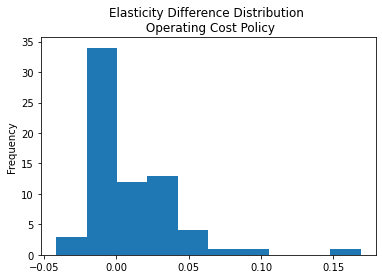

In [87]:
diff['diff'].plot.hist()
plt.title('Elasticity Difference Distribution \n Operating Cost Policy');

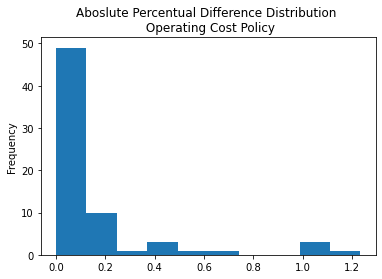

In [91]:
diff['pct'] = ((diff['new_elasticity'] - diff['old_elasticity'])/diff['new_elasticity']).apply(np.abs)
# diff[diff['pct']<9]['pct'].plot.hist()
diff['pct'].plot.hist()
plt.title('Aboslute Percentual Difference Distribution \n Operating Cost Policy');

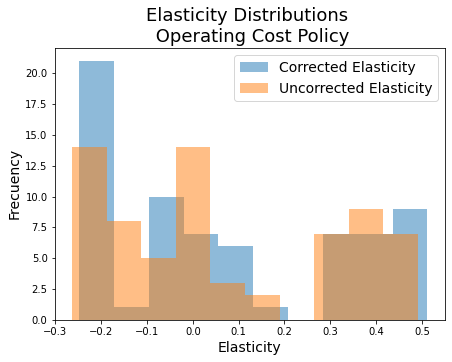

In [92]:
diff['new_elasticity'].plot.hist(alpha = 0.5, label = 'Corrected Elasticity', figsize=(7, 5))
diff['old_elasticity'].plot.hist(alpha = 0.5, label = 'Uncorrected Elasticity')
plt.title('Elasticity Distributions \n Operating Cost Policy',fontsize = 18)
plt.legend(fontsize = 14)
plt.ylabel('Frecuency', fontsize = 14)
plt.xlabel('Elasticity', fontsize = 14)
plt.show()

In [90]:
diff.sort_values(by = 'pct', ascending = False).head(50)

,,new_elasticity,old_elasticity,diff,pct
policy,category,,,,
average_traveltime_mode,TNC - Ride Alone,-0.013608,0.003187,-0.016795,1.234176
seat_utilization,none,-0.000407,-0.000844,0.000437,1.075210
average_traveltime_mode,Walk,0.060351,-0.002987,0.063338,1.049492
average_commute_trip_lenght,Walk,0.060351,-0.002987,0.063338,1.049491
average_traveltime_mode,TNC - Pooled,-0.018025,-0.006695,-0.011329,0.628538
vmt_per_capita_county,Napa,-0.174875,-0.262898,0.088023,0.503347
average_vehicle_ownership,none,-0.000130,-0.000194,0.000064,0.489038
average_commute_trip_lenght,TNC - Ride Alone,-0.020549,-0.010524,-0.010025,0.487864
cs_per_capita_county,Napa,0.438727,0.269934,0.168793,0.384734
